478 Assignment 3<br>
Question 1)

In [106]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt 
import os
import pandas as pd

#function for solving for data from files
def cylindercalcs(file,i):
    #opens file for reading
    f = open("C:\\Users\\kylek\\Documents\\GitHub\\Fourth-Year\\478\\pressuredata\\" + file,'r')
    #reads data from file
    results = np.array([])
    data = np.loadtxt(f)
    crankangle = data[:,0]
    pressure = data[:,1]

    #engine parameters
    cv = 0.717
    R = 0.287
    CR = 10
    Vs = 0.55#L
    Vc = np.round(0.55/(CR-1),3)
    lc = 148.0 #connecting rod length
    rct = 43.3 #crank throw radius
    rpm = 2000

    T = np.array([3.9,7.8,10.4,12.8,15.2,20.9,27.2,33.2,38.8]) #Brake Torque
    mdot = np.array([5.60,6.50,7.34,8.20,9.09,11.13,13.5,15.45,17.49])/30 #g/s
    injectiontime = np.array([3355,4115,4670,5209,5738,6938,8260,9549,10821])*1e-6 #s
    nr = 2
    volume = Vc*(1+(1/2*(CR-1))*(lc/rct + 1 - np.cos(np.deg2rad(crankangle))-np.sqrt((lc/rct)**2-(np.sin(np.deg2rad(crankangle))**2))))
    cyclesdt = rpm/60/2 #cycle/s
    m = mdot[i]/cyclesdt
    LHV = 44.7 #kJ/g
   
    dPdt = np.diff(pressure)/np.diff(crankangle)
    dVdt = np.diff(volume)/np.diff(crankangle)

    Qnet = cv/R*volume[0:3599]*dPdt+pressure[0:3599]*dVdt*(cv/R +1)

    winet = np.trapz(pressure,volume)
    imepnet = winet/Vs

    wigross = np.trapz(pressure[900:2700],volume[900:2700])
    imepgross = wigross/Vs

    bmep = T[i]*2*np.pi*nr/Vs/100
    fmep = imepgross - bmep
    pmep = imepgross -imepnet

    indeff = winet/(m*LHV)/10
    meff = bmep/imepnet
    beff = indeff*meff
  
    brakePower = np.pi/30*rpm*T[i] #Watts
    BSFC = m/brakePower*3.6e6*10

    #adds values to results calc
    results=np.append(results,imepgross)
    results=np.append(results,fmep)
    results=np.append(results,bmep)
    results=np.append(results,pmep)
    results=np.append(results,indeff)
    results=np.append(results,meff)
    results=np.append(results,beff)
    results=np.append(results,BSFC)
    
    return  results

i = 0
finaldata = np.zeros((9,8))
#gets the data for each file in folder
for file in os.listdir("C:\\Users\\kylek\\Documents\\GitHub\\Fourth-Year\\478\\pressuredata"):
    finaldata[i] = cylindercalcs(file,i)
    i += 1
finaldata = np.round(finaldata,2)
#Seperates data into plotable values
table = finaldata
df = pd.DataFrame(table, columns = ['pig', 'pf', 'pb', 'pp','ni','nm','nb','BSFC'], 
                  index=['pin28', 'pin36', 'pin40', 'pin45','pin49','pin60','pin70','pin80', 'pin'])
print(df)


         pig    pf    pb    pp    ni    nm    nb    BSFC
pin28   2.88  1.99  0.89  0.72  0.24  0.41  0.10  493.63
pin36   3.62  1.83  1.78  0.68  0.28  0.61  0.17  286.48
pin40   4.25  1.87  2.38  0.65  0.30  0.66  0.20  242.63
pin45   4.68  1.76  2.92  0.60  0.31  0.72  0.22  220.23
pin49   5.34  1.87  3.47  0.58  0.32  0.73  0.24  205.59
pin60   6.70  1.92  4.78  0.49  0.34  0.77  0.26  183.07
pin70   8.12  1.90  6.21  0.39  0.35  0.80  0.28  170.62
pin80   9.22  1.63  7.59  0.28  0.36  0.85  0.30  159.98
pin    10.39  1.52  8.87  0.24  0.36  0.87  0.31  154.96


Question 2

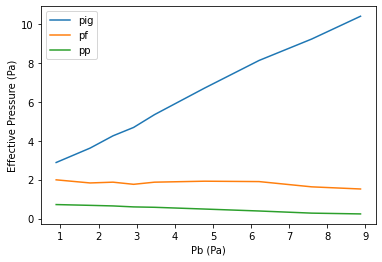

In [107]:
pig = finaldata[:,0]
pf = finaldata[:,1]
pb = finaldata[:,2]
pp = finaldata[:,3]
ni = finaldata[:,4]
nm = finaldata[:,5]
nb = finaldata[:,6]
BSFC = finaldata[:,7]

#plotting
plt.plot(pb, pig, label = 'pig')
plt.plot(pb, pf, label = 'pf')
plt.plot(pb, pp, label = 'pp')
plt.legend(loc = 'upper left')
plt.xlabel('Pb (Pa)')
plt.ylabel('Effective Pressure (Pa)')
plt.show()

As the bmep increases, the imep also linearly increases, as they are directly tied togehter through the crankshaft. The fmep largely stays the same, as the speed of the piston is equal for all operating states. The pmep decreases slightly because the intake pressure is increasing, meaning less work needs to be done to pump air into the cylinder.

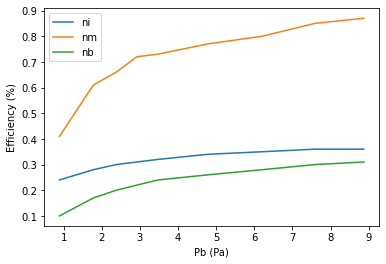

In [108]:
plt.plot(pb, ni, label = 'ni')
plt.plot(pb, nm, label = 'nm')
plt.plot(pb, nb, label = 'nb')
plt.legend(loc = 'upper left')
plt.xlabel('Pb (Pa)')
plt.ylabel('Efficiency (%)')
plt.show()

The indicated efficiency increases with bmep, as the net work increases 

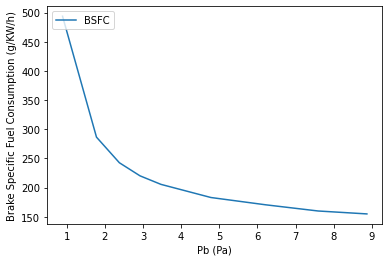

In [109]:
plt.plot(pb, BSFC, label = 'BSFC')
plt.legend(loc = 'upper left')
plt.xlabel('Pb (Pa)')
plt.ylabel('Brake Specific Fuel Consumption (g/KW/h)')
plt.show()

Question 2 <br>


In [114]:
Vs = 0.55 #L
P1 = 80 #kPa
R = 0.287 #Pa*m^3/K/g
pair = 1.205 #g/L

mair = Vs*P1/R/298 #g
nv = (mair-(15.45/30)*9549e-6)/(Vs*1.01)
print("for Pint = 0.8 the volumetric efficiency is " + str(nv))

Vs = 0.55 #L
P1 = 28 #kPa
R = 0.287 #Pa*m^3/K/g
pair = 1.205 #g/L

mair = Vs*P1/R/298 #g
nv = (mair-(15.45/30)*9549e-6)/(Vs*1.01)
print("for Pint = 0.28 the volumetric efficiency is " + str(nv))

for Pint = 0.8 the volumetric efficiency is 0.9172739928332097
for Pint = 0.28 the volumetric efficiency is 0.3152915721090852


Question 3<>


In [120]:
#A
#engine parameters
Vd = 5.71
n = 8
Vs = Vd/n
rpm = 6000
bmep = 10
nr = 2
nb = 0.3
LHV = 44.7 #kJ/g


Wb = bmep * Vd
mf = Wb/nb/LHV

print(str(mf*30)+" g/30s")

#b


127.74049217002236 g/30s
